# <font color=571B7E> Data Analysis Assignment Number Three - Bootstraps and Salaries </font>

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Was added because of some numpy warning regarding
                                                               # indexing floats in an array after updating numpy
df = pd.read_csv('ds_salaries.csv')

# <font color = red>  Part One - Data Field salaries Dataset </font>

## <font color=blue> Preprocessing the Dataset </font>

Before we begin answering the questions in this assignment in order to avoid misjudgments, we should analyze the dataset we are working with.

What is the shape of the data set:

In [2]:
#Print the dataframe dimensions in an implicit manner.
print(f'The data set has {df.shape[0]} rows and {df.shape[1]} columns.')

The data set has 1565 rows and 6 columns.


Are there any missing values in our dataset?

In [3]:
#Check if there are any null elements in the dataframe.
df.isna().sum()

experience_level    0
employment_type     0
job_title           0
salary_in_usd       0
remote_ratio        0
company_size        0
dtype: int64

It appears the dataset doesn't contain any anomalies such as missing data so it should be "safe" to operate on it without pre-processing it.

## <font color=blue> Question One </font>  

**Based on a survey that had been carried out on feburary 2023, the ratio of americans who entirely work from home is 35%.
Under the assumption that this variable had also been measured amongst the "Data" workers in the US and had been found to be similiar:** 

**Does the csv (data file) represent well the population of the "Data" workers? Or does it countain a sub representation for workers that work entirely from home?**

**Test the claim using the variable <font color=green> remote_ratio </font> with a siginificane level of <font color=green> 0.05 </font>.**

### <font color=teal> Subquestion 1 </font>

**State the null hypothesis and the alternative hypothesis.**

Let $p$ be the precentage of workers that work entirely from home.
$$ 
H_0: p = 35\% \
$$
$$
 H_1: p \neq 35\%
$$

### <font color=teal> Subquestion 2 </font>

**What is the test statistic?**

The test statistic in this question would be the ratio of data related field employees that work from home in our dataframe.

In [4]:
#Calculate the ratio of data related field employees
prob_remote_in_data = len(df[df.remote_ratio == "fully remote"])/df.shape[0]  
prob_remote_in_data_rounded = round(prob_remote_in_data*100,3)
print(f'Our test statistic value is {prob_remote_in_data_rounded}% of employees that work completely remote.')

Our test statistic value is 32.46% of employees that work completely remote.


### <font color=teal> Subquestion 3 </font>

**Write code that test the hypothesis using simulation. Write explanations for your code.**

In [5]:
'''Similar to the dice roll simulations create a simulation under the null hypothesis
   employment_type would be the types we are intersted in
   prob_for_type would be the probability for every type
   sampling_size would be the size ouf or simulations which match our sample
   prob_remote_in_data is our real probability
    '''
employment_type = ["fully remote","not fully remote"]
prob_for_type = [0.35,0.65]                           
sampling_size = df.shape[0]                           
prob_remote_in_data = len(df[df.remote_ratio == "fully remote"])/df.shape[0]  

In [6]:
def single_mean_simulation(types,prob_for_type,size,desired_type):
    '''This function creates a single simulation under the null hypothesis and counts how many desired types 
        we have in our sample
        returns a ratio describing the percentage of desired type count in our overall size'''
    new_simulated_sample = np.random.choice(employment_type, p=prob_for_type, size=size)
    count = 0
    for i in range(size):
        if new_simulated_sample[i] == desired_type:
            count += 1
    return count/size

In [7]:
def mean_simulation(types , prob_for_type, num_replications, original_sample_size , desired_type): 
    '''This is a wrapper function for single_mean_simulation , calls it num_replication 
       times and puts them all in an array
       returns an array of percentage of desired in simulations'''
    
    simulated_means = np.empty(num_replications)
    for i in range(num_replications):
        simulated_means[i] = single_mean_simulation(types,prob_for_type,original_sample_size,desired_type)

    
    return simulated_means

In [8]:
simulated_means = mean_simulation(employment_type,prob_for_type,1000,sampling_size,"fully remote")

### <font color=teal> Subquestion 4 </font>

**What is your conclusion? Present a numerative result as well as a graph depicting the test result**

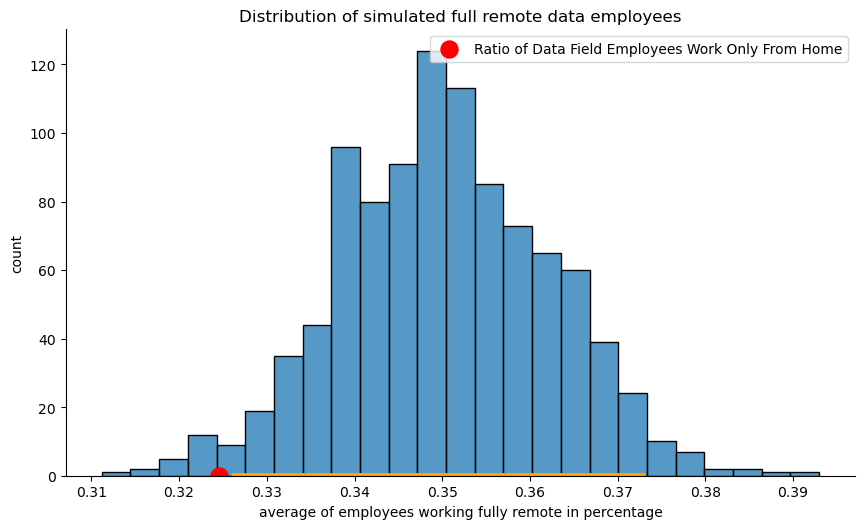

In [9]:
#Display the means of the simulations in a histogram plot with 95% CI and our test statistic.
facetgrid_obj = sns.displot(simulated_means, stat='count',aspect = 1.75)
facetgrid_obj.axes[0, 0].scatter(prob_remote_in_data, 0, s=150, color='red')  # draw observed value
facetgrid_obj.axes[0, 0].legend(['Ratio of Data Field Employees Work Only From Home'])
left_end = np.percentile(simulated_means, 2.5,method='higher')
right_end = np.percentile(simulated_means, 97.5,method='higher')
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5)
facetgrid_obj.set(title='Distribution of simulated full remote data employees', xlabel='average of employees working fully remote in percentage', ylabel='count')
plt.show(facetgrid_obj)

In [10]:
print(f'Using Confidence interval of confidence 95% our test statistic is {prob_remote_in_data_rounded}% which is not within the confidence interval  [{round(left_end*100,3)}% , {round(right_end*100,3)}%]' )

Using Confidence interval of confidence 95% our test statistic is 32.46% which is not within the confidence interval  [32.588% , 37.316%]


As the question demanded both numerical value and a graph representation we can see based on the graph that the mean of the dataset is not inside of the confidence interval therefore we will reject the null hypothesis.
The dataset does not represent the salaries of people who work in the data field,under the assumption that on average 35% of data field related employees work entirely remotely.

## <font color=blue> Question Two </font>  

**<font color=green> Background </font>: There is a claim that Data Scientists earn in average a salary that is equal to the salary that Data Engineers earn. Test the claim based on the given data, under the assumption that it represents well the "Data" field related jobs in the US**

<font color=red> Note </font> Questions 2~4 contains the same function with a simple statistic change, this was intentionally done in order to make it easier to see what the function does and slightly reduce the runtime as the runtime of each bootstrap simulation is long.

### <font color=teal> Subquestion 1 </font>

**State the null hypothesis and the alternative hypothesis**

Let $d$ denote the difference between the mean salary of data scientists and data engineers.


$$ 
H_0: d = 0\ \
$$
$$
 H_1: d \neq 0\
$$

### <font color=teal> Subquestion 2 </font>

**What is the test statistic?**

The test statitistic is the difference between the mean salary of data scientists and data engineers in our dataset.

### <font color=teal> Subquestion 3 </font>

**Write code that tests the hypothesis using confidence interval (with at aleast 5000 replications). Explain the code that you write.**

In [11]:
#Calculate and print the amount of data scientists and data engineers in our database
data_scientist_count = df[df['job_title'] == "Data Scientist"].shape[0]
data_engineer_count =  df[df['job_title'] == "Data Engineer"].shape[0]
print("Before answering this question lets first figure out how many engineers we have of both types.")
print(f'There are {data_scientist_count} Data Scientists in this data set.')
print(f'There are {data_engineer_count} Data Engineers in this data set.')

Before answering this question lets first figure out how many engineers we have of both types.
There are 315 Data Scientists in this data set.
There are 472 Data Engineers in this data set.


Next, we should filter out the dataset so we could more easily work on it.

In [12]:
#create a new dataframe filtering out the irrelevent job titles.
df_DE_DS = df[(df['job_title'] == "Data Scientist") | (df['job_title'] == "Data Engineer")] 
df_DE_DS.reset_index(inplace=True) #There's no need for this line but it's nice to have.
df_DE_DS = df_DE_DS.drop(columns={'index'}) #Pandas refuses to allow inplace

The Dataset we are working on in this question:

In [13]:
#A simple visualization of our new Dataframe.
df_DE_DS

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,SE,FT,Data Scientist,147100,hybrid,M
1,SE,FT,Data Scientist,90700,hybrid,M
2,SE,FT,Data Scientist,170000,hybrid,M
3,SE,FT,Data Scientist,150000,hybrid,M
4,SE,FT,Data Engineer,253200,hybrid,M
...,...,...,...,...,...,...
782,SE,FT,Data Engineer,182000,fully remote,M
783,MI,FT,Data Scientist,130000,hybrid,M
784,MI,FT,Data Scientist,90000,hybrid,M
785,EN,FT,Data Engineer,160000,hybrid,M


In [14]:
def diff_of_avgs(df, column_name, grouping_var):
    '''This function gets a df and calculates the difference of two means
    df is our dataframe
    column_name is our column of interest
    grouping_var would be the feature we would like to seperate by our two groups 
    returns the difference between the two averages'''
    grpby_var = df.groupby(grouping_var) #creating a groupby object for our two labels
    avgs = grpby_var[column_name].mean() #calculates the mean for each series
    return avgs[1] - avgs[0]            

def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    '''This function creates an array of means of bootstraps generated by seperate samples
    original_df would be the unaltered Dataframe
    alt_df would be the filtered dataframe
    column_of_interest would be the column we are interested to test
    bootstrap_count describes the amount of bootstraps
    sample_size would be the size of each sample we want to generate
    returns an array of differences between the means'''    
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

In [15]:
#Create the bootstrap array
difference_in_salary = bootstrap_mean_difference(df_DE_DS , 'salary_in_usd','job_title',5000)

### <font color=teal> Subquestion 4 </font>

**Find confidence intervals to the paramater values you found with confidence level of 0.99 and 0.95**

<font color=purple> For 95% confidence level: </font>

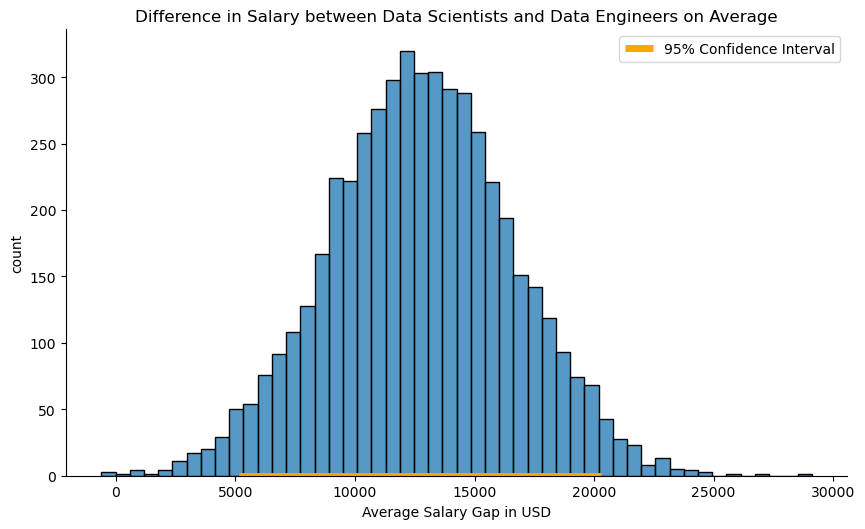

In [16]:
#Display the histogram of our difference in salary means with a 95% CI
facetgrid_obj = sns.displot(difference_in_salary, stat='count',aspect = 1.75)
facetgrid_obj.set(title='Difference in Salary between Data Scientists and Data Engineers on Average', xlabel='Average Salary Gap in USD', ylabel='count')

left_end = np.percentile(difference_in_salary, 2.5,method='higher')
right_end = np.percentile(difference_in_salary, 97.5,method='higher')
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5)
facetgrid_obj.axes[0,0].legend(['95% Confidence Interval'])

plt.show(facetgrid_obj)

In [17]:
print(f'The Confidence Interval of 95% confidence is of range = [{left_end}$,{right_end}$]')

The Confidence Interval of 95% confidence is of range = [5132.261535170401$,20274.067581758194$]


<font color=purple> For 99% confidence level: </font>

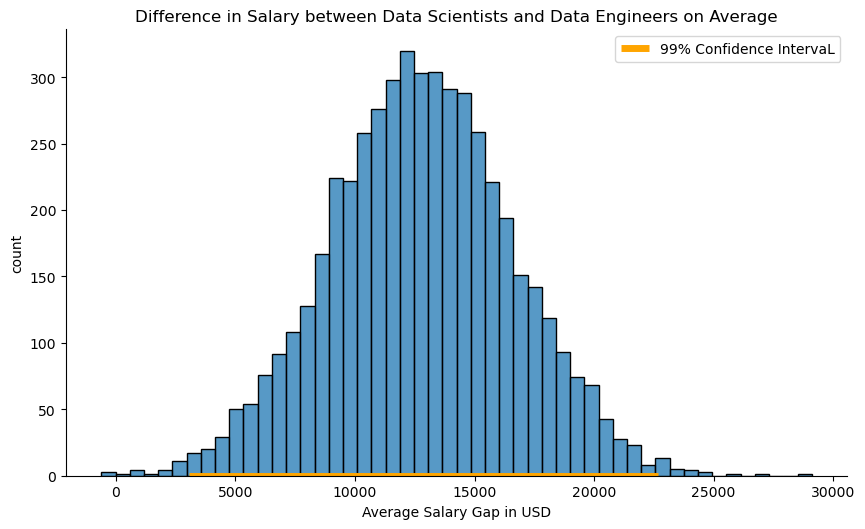

In [18]:
facetgrid_obj = sns.displot(difference_in_salary, stat='count',aspect = 1.75)
facetgrid_obj.set(title='Difference in Salary between Data Scientists and Data Engineers on Average', xlabel='Average Salary Gap in USD', ylabel='count')

left_end = np.percentile(difference_in_salary, 0.5,method='higher')
right_end = np.percentile(difference_in_salary, 99.5,method='higher')
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5)
facetgrid_obj.axes[0, 0].legend(['99% Confidence IntervaL'])
plt.show(facetgrid_obj)

In [19]:
print(f'The Confidence Interval of 99% confidence is of range = [{round(left_end,3)}$,{round(right_end,3)}$]')

The Confidence Interval of 99% confidence is of range = [3043.853$,22677.461$]


### <font color=teal> Subquestion 5 </font>

**What is your conclusion? Present numerical values as well as graphs depicting the test' result for both of the mentioned confidence levels**

It is clear that for both confidence levels our test statistic is not within our confidence interval therefore we should reject the null hypothesis data engineers and data scientists do not earn on average the same salary.

## <font color=blue> Question Three </font>  

**Calculate the confidence interval of confidence 95% for mean salaries of workers in medium sized companies(M). Explain the code that you wrote and explicitly display the confidence interval.**

As we did before we should first filter out the desired group, in this question it would be medium sized companies.

In [20]:
#Filter out our dataframe based on the requirement and reset the index.
df_M_size_comp = df[df['company_size'] == "M"]
df_M_size_comp.reset_index(inplace=True)
df_M_size_comp = df_M_size_comp.drop(columns={'index'})

The Dataset in this question:

In [21]:
#Print to give a sense of what dataframe we are working on.
df_M_size_comp

,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,SE,FT,Data Scientist,147100,hybrid,M
1,SE,FT,Data Scientist,90700,hybrid,M
2,SE,FT,Data Analyst,130000,fully remote,M
3,SE,FT,Data Analyst,100000,fully remote,M
4,SE,FT,Data Modeler,147100,hybrid,M
...,...,...,...,...,...,...
1496,MI,FT,Data Analyst,100000,hybrid,M
1497,MI,FT,Data Scientist,130000,hybrid,M
1498,MI,FT,Data Scientist,90000,hybrid,M
1499,EN,FT,Data Engineer,160000,hybrid,M


Because we are specifically told this dataset contains a sample that represents well to the real world companies of size M we should take it as a sample rather than generating a sample from it. If we generate a sample from it we would be creating a sample from a sample.

In [22]:
def bootstrap_mean(original_sample, column_name, num_replications):
    '''This funcion creates a bootstrap mean using a sample
        original_sample is the sample we use to create the bootstraps
        column_name is the name of the column we are intersted in
        num_replications would be the bootstrap count
    '''
    original_sample_size = original_sample.shape[0] 
    original_sample_var_of_interest = original_sample[[column_name]]
    bstrap_means = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_var_of_interest.sample(original_sample_size, replace=True) 
        resampled_mean = bootstrap_sample.mean()
        bstrap_means[i] = resampled_mean
    
    return bstrap_means

In [23]:
#Creates a single sample and generates a bootstrap of means in the image of that sample.
sample = df_M_size_comp.sample(200,replace=True)
M_company_simulated_means =  bootstrap_mean(df_M_size_comp,"salary_in_usd",5000)

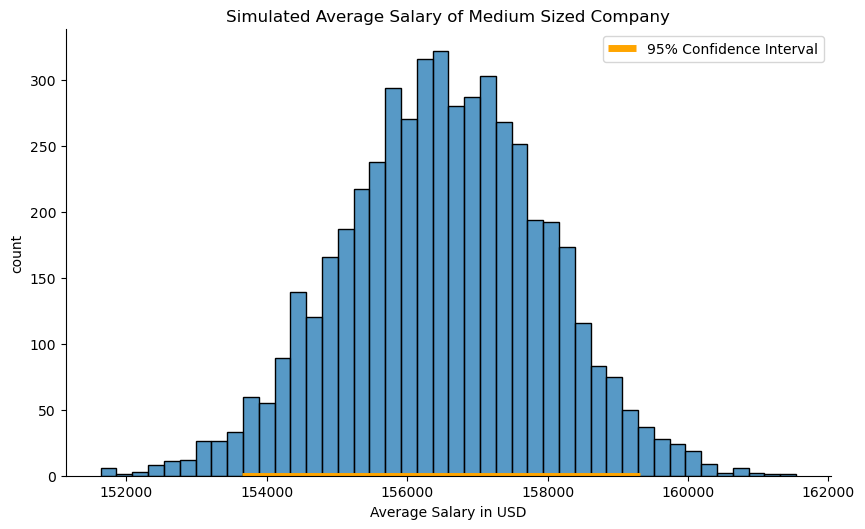

In [24]:
#Display the sample in a histogram with a 95% CI.
facetgrid_obj = sns.displot(M_company_simulated_means, stat='count',aspect = 1.75)
facetgrid_obj.set(title='Simulated Average Salary of Medium Sized Company', xlabel='Average Salary in USD', ylabel='count')

left_end = np.percentile(M_company_simulated_means, 2.5,method='higher')
right_end = np.percentile(M_company_simulated_means, 97.5,method='higher')
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=5)
facetgrid_obj.axes[0, 0].legend(['95% Confidence Interval'])

plt.show(facetgrid_obj)

The confidence interval for the Simulated Average Salary of Medium Sized Company Employees is:

In [25]:
#Display the CI bounds.
print(f'The lower bound is: {round(left_end,3)} USD\nThe upper bound is: {round(right_end,3)} USD')

The lower bound is: 153650.334 USD
The upper bound is: 159315.478 USD


## <font color=blue> Question Four </font>  

<font color=green> Background </font>:**A certain financial data analysis company  would like to know what is the median that is being paid to workers in the data field. A new clumsy data analyst accidently deleted the data file. In order to find the median, he decided to create a sample and calculate its median using bootstraps. He found a file with data on employees in the data field in one of the e-mails that he recieved, without knowing that the people in the file are only employees that dont work from home completely (Hybrid). The employee picked 150 people at random from the file and asked them their salary. Since he promised a monetary compensation to those that responded, all of the people that recieved the e-mail replied back. Assume the data that was reported is true and exists in the original data file.**

### <font color=teal> Subquestion 1 </font>

**In order to test the chance the employee succeeded creating (from the sample of hybrid employees) confidence interval of 95% that contains the true median of the salary of all employees, run 100 simulations that sample 150 employees from the population of hybrid employees and calculates for each sample the confidence interval of confidence 95% of the median of their salary. Out of 100 confidence inervals how many of them contains the true median of the employees that work in the "data field" as it can be calculated directly from the original data?**

In [26]:
#Filter out the dataframe to have only hybrid type employees.
df_hybrid = df[df['remote_ratio'] == "hybrid"]
print(f'The filtered (hybrid) dataset the employee will sample from:')
df_hybrid

The filtered (hybrid) dataset the employee will sample from:


,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
2,SE,FT,Applied Scientist,222200,hybrid,L
3,SE,FT,Applied Scientist,136000,hybrid,L
4,SE,FT,Data Scientist,147100,hybrid,M
5,SE,FT,Data Scientist,90700,hybrid,M
8,EN,FT,Applied Scientist,213660,hybrid,L
...,...,...,...,...,...,...
1560,SE,FT,Machine Learning Engineer,134500,hybrid,L
1561,MI,FT,Data Scientist,130000,hybrid,M
1562,MI,FT,Data Scientist,90000,hybrid,M
1563,EN,FT,Data Engineer,160000,hybrid,M


In [27]:
def bootstrap_median(original_sample, column_name, num_replications):
    '''This function creates a bootstrap of medians of a certain column based on a specific sample
        original_sample is our original sample used to create the bootstrap
        column_name is our column we are interested in for the median
        num_replications would the bootstrap size
        returns an array of the bootstrap medians'''
    
    original_sample_size = original_sample.shape[0] # replicates with same size at the sample
    original_sample_var_of_interest = original_sample[[column_name]] # filter out only the columns we are interested in
    bstrap_medians = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_var_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_median = np.percentile(bootstrap_sample,50 , method='higher')
        bstrap_medians[i] = resampled_median
    
    return bstrap_medians

def is_real_median_in_bootstrap(real_median,bootstrap):
    '''This function checks if our median is inside of the bootstrap confidence interval of confidence 95%
       bootstrap describes the bootstrap
       real median would be our median
       returns 1 if it is inside the CI and 0 otherwise '''  
    left_end = np.percentile(bootstrap, 2.5,method='higher')
    right_end = np.percentile(bootstrap, 97.5,method='higher')
    if ((real_median >= left_end) and (real_median <= right_end)):
        return 1
    else:
        return 0
    
def multiple_bootstrap_for_median_salary(original_df , alt_df, column_of_interest, bootstrap_count, sample_size):
    '''This function creates an array of medians of bootstraps generated by seperate samples
       original_df would be the unaltered Dataframe
       alt_df would be the filtered dataframe
       column_of_interest would be the column we are interested to test
       bootstrap_count describes the amount of bootstraps
       sample_size would be the size of each sample we want to generate'''
    real_median = np.percentile(original_df[column_of_interest] , 50 , method="higher")
    count = 0
    for i in range(bootstrap_count):
        sample = alt_df.sample(sample_size,replace=True)  
        bootstrap = bootstrap_median(sample,"salary_in_usd",500)
        count += is_real_median_in_bootstrap(real_median,bootstrap)
    return count/bootstrap_count
    

In [ ]:
#Create an array of multiple bootstraps generated from seperate samples and counts how many of the real median is in them.
count = multiple_bootstrap_for_median_salary(df,df_hybrid,"salary_in_usd",100,150)

In [ ]:
#Displays the results of our multiple bootstraps.
print(f'The percentage of bootstraps generated with the hybrid type employees in which the real median of all employees is       located inside the CI is {count*100}%.')

### <font color=teal> Subquestion 2 </font>

**The data analyst used a sample that wasn't taken at random from the same population that he is testing (but from another population). In spite of that, does the theoretical gurantee of the bootstrap method? Explain your reasoning.**

The answer depends but in general: <b> No </b>, there is no theoretical gurantee of the bootstrap method if the sample that was taken is not from the same population that the data analyst is testing. 


One of the guiding principles behind the bootstrap method is the assumption that the sample we drew represents the population we are testing. Assuming such an assumption (and other such as sufficently sized sample size) is true, we are able to indirectly draw infinetly from the original population. Which in turn, would let us find approximations about said population.

However, since the data analyst drew from a seperate population, there is no gurantee that the sample he drew represents in any form the "data related employees" , even if the data analyst drew from a subset of a data employees (as in any specific attribute) there is no gurantee it wont skew his results.

<font color=purple> Side note </font>: The chance the bootstrap does work is the case the second population happens to distribute similarly as the population he is testing. In regards to a specific statistic function, if the parameter is "relatively" close to the actual real parameter (A rather surprising example would be subquestion 3 of this question ). 

### <font color=teal> Subquestion 3 </font>

**How would your answers change in Subquestion A and B if the data analysis company would like to know the quarter salary of the employees working in the field (as in , instead of calculating the median , the data analyst would calculate the first quarter of the salaries). Explain your reasoning.**

<font color=purple> Hint </font>: Draw the distribution of salaries or their sum for two different employee groups.

In [ ]:
#Seperates and draws two histograms for salary size per remote type.
salary_distribution = sns.FacetGrid(df,col="remote_ratio")
salary_distribution.map(sns.histplot, "salary_in_usd")

In [ ]:
#Print the first quarter of both employee types.
print(f'The first quarter of all employees is {np.percentile(df["salary_in_usd"], 25,method = "higher")}.')
print(f'The first quarter of hybrid employees is {np.percentile(df_hybrid["salary_in_usd"], 25,method = "higher")}.')

<font color=green>Claim </font>: It seems both quarters are of the same value therefore even if we mix between the two group for the statistic quarter <font color=red> ONLY </font> we should expect to see it the exact same amount of times in our bootstrap's CI as we would see it if we selected the correct group, the reason for that being is that as we create bootstraps of one group we would expect to see their statistic test in the bootstraps 95% of the time but as the values are identical this would mean the other group's statistic test would also show the exact amount of time.

As a demonstration  let's test the idea out by creating bootstraps similar to question 4-1A.

In [ ]:
def bootstrap_quarter(original_sample, column_name, num_replications):
    '''This function creates a bootstrap of quarter of a certain column based on a specific sample
        original_sample is our original sample used to create the bootstrap
        column_name is our column we are interested in for the quarter
        num_replications would the bootstrap size
        returns an array of the bootstrap quarter'''
    
    original_sample_size = original_sample.shape[0] 
    original_sample_var_of_interest = original_sample[[column_name]]
    bstrap_quarters = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_var_of_interest.sample(original_sample_size, replace=True) #create a bootstrap sample
        resampled_quarter = np.percentile(bootstrap_sample[column_name],25,method='higher') #calculate quarter
        bstrap_quarters[i] = resampled_quarter       
        
    return bstrap_quarters
        
def is_real_quarter_in_bootstrap(real_quarter,bootstrap):
    '''This function checks if the real quarter is in our bootstrap CI with confidence of 95%
       real_quarter is our real quarter
       bootstrap is our bootstrap
       returns 1 if true , false otherwise'''
    left_end = np.percentile(bootstrap, 2.5,method='higher')
    right_end = np.percentile(bootstrap, 97.5,method='higher')
    if ((real_quarter >= left_end) and (real_quarter <= right_end)):
        return 1
    else:
        return 0
    
def multiple_bootstraps_for_quarter_salary(original_df , alt_df, column_of_interest, bootstrap_count, sample_size):
    '''This function creates an array of first quarter of bootstraps generated by seperate samples
       original_df would be the unaltered Dataframe
       alt_df would be the filtered dataframe
       column_of_interest would be the column we are interested to test
       bootstrap_count describes the amount of bootstraps
       sample_size would be the size of each sample we want to generate'''
    real_quarter = np.percentile(original_df[column_of_interest],25,method='higher')
    count = 0
    for i in range(bootstrap_count):
        sample = alt_df.sample(sample_size,replace=True)
        bootstrap = bootstrap_quarter(sample,"salary_in_usd",500)
        count += is_real_quarter_in_bootstrap(real_quarter,bootstrap)
    return count/bootstrap_count
    

In [ ]:
#Counts how many times the real first quarter is in a 100 bootstraps generated by samples from a hybrid remote type dataframe.
hybrid_quarter_in_all = multiple_bootstraps_for_quarter_salary(df,df_hybrid,"salary_in_usd",100,150)

In [ ]:
print(f'Based on our demonstration we found that the hybrid quarter was located a {hybrid_quarter_in_all*100}% of the time in the bootstraps        generated with the original DF.')

# <font color = red>  Part Two - Racism in the American Judiciary System </font>

## <font color=blue> Question One </font>  

**In 2~4 short sentences explain why it is problematic to use bootstraps to calculate confidence intervals using very small sample sizes.**

As previously mentioned in <font color=teal> Part 1 - Question 4 Subquestion 2</font> the theoretical background of bootstraps rely on large sample sizes picked at random in order to simulate the distribution of the population we are attempting to test. Using small sample sizes amplifies the variance / "noise" of the sample which in turn would hinder its ability to mimic the qualities our original unreachable population has.  

## <font color=blue> Question Two </font>  

<font color=green> Background </font>: **Researchers in the US examined the effect race has on judgets's death penalty verdict during trialing a person who had been accused of murder.**

**The researchers have found there's a seems to be a difference whether or not the victim's race had been taken in consideriation or not. While considering the race of the victim, black convicts are sentenced the death penalty more often than white people. However, when not considering the race of the victim black people are sentenced the death penalty less than white people.**

### <font color=teal> Subquestion 1 </font> 

**Which statistical phenomenon could explain the gap between the results whether we consider the race of the victim and when we do not?**

The difference in the gap could be explained by the phenomenon "<font color=#006400 >Simpson's Paradox </font>".

<font color=green>Simpson's Paradox </font> is a paradox that claims that there could always be a new frame in which we could observe our data that would completely shift our conclusion.


For example, in this specific dataset:


Without including the race of the victim the conclusion we might reach would be "The judges are biased against black people"


However, when we do include the race of the victim it would appear that the judges are actually biased against white people.

### <font color=teal> Subquestion 2 </font>

### <font color=teal> Sub 1 of Subquestion 2 </font>

**Which tendecy of the judges could explain the gap in the results?** 

<font color=purple> Hint </font>: Which scenario would more likely result a death sentence?

There are a couple of factors that might bias a judge to verdict a death sentence in different proprotions to black and white people.

<font color=green> Background for the crime </font>: It could be the case that whenever black people commit murder they do so for backgrounds that are far less heinous than their white counterpart(An example for this would be recent rise of white school shooters). As we assume the death verdict would be given if and only if there is concrete evidence to the crime and the crime is beyond reasonable of a doubt of malicious heinous intent, this would result in black people given the death sentence less often.

<font color=green> Racism </font>: It could also be a simple fact that although the US is perceived to be racist against people of color, in reality they are racially biased against white people.

### <font color=teal> Sub 2 of Subquestion 2 </font>

**Which tendecy of the convicts could explain the gap in the results?** 

<font color=purple> Hint </font>: What is the relation between the race of the victim and the convicts race?

Based on the data presented when seperated to race it would appear that black people are sentenced to death more often than white people when they are convicted of murder. There are a few explanations that could explain these statistics.

<font color=green> Frequency </font>: When looking at the chart it seems apparent that mixed race crimes murders are rather uncommon . When we compare the death verdict sentence rate per convict race per victim race it gives us the impression that black people are inpropertionally given the death sentence compared to white people. However, in reality it could be the case that because these cross racial murders are rather infrequent (when looking at the overall count) it could be the case that these exact murders were unique in some sort of a way that made the judge rule the way that he did.
